<a href="https://colab.research.google.com/github/FebryanRizki24/JobsheetAI/blob/main/image_compression_using_kmeans_clusttering_Febryan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#####################################################################
# A try to approach Kmeans clustering for image compression         #
# Kindly do comment for ideas here                                  #
# Getting huge information loss  here                               #
#####################################################################

In [1]:
## Making Essential imports
import numpy as np
import pandas as pd
import cv2
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
## for the purpouse of this demonstraion i will be needing only 1 image 
## selecting this one randomly

In [4]:
Img = cv2.imread('/content/guzzlord.jpg')

## lets define a K means Clusterer
def KmeansClusterer (vect, numIntensities, width, height):
    kMeans = KMeans(n_clusters= numIntensities) #untuk mengelompokkan data
    kMeans.fit(vect) #untuk menentukan nilai cluster
    
    labelArr = kMeans.labels_ #menambahkan kolom cluster
    labelArr = np.reshape(labelArr, (width, height)) #merubah baris kolom
    
    return labelArr #mengembalikan nilai 
    
    
    
    
## lets just define a function which can take the number of color intensisties and do the work for as
def compressor (image, numIntensities, width, height):
    ## lets resize our image to size 200 * 200
    image = cv2.resize(image, (width, height))
    ## with our image resized lets split our image into its color channels
    r,g,b = cv2.split(image) 
    ## lets reshape each color channel 
    r = np.reshape(r, (width*height, 1)) #merubah baris kolom[row,column]
    b = np.reshape(b, (width*height, 1))
    g = np.reshape(g, (width*height, 1))
    
    ## let compressor do compressing
    r = KmeansClusterer(r, numIntensities, width, height)
    b = KmeansClusterer(b, numIntensities, width, height)
    g = KmeansClusterer(g, numIntensities, width, height)
    
    ## constructing the Composite image 
    img2 = cv2.merge((b, g, r))
    
    ## let plot this image side by side
    plt.figure(figsize= (20, 15)) #merubah ukuran gambar
    plt.subplot(2, 3, 1)
    plt.imshow(image) #menggambar
    plt.title('original Image')
    
    plt.subplot(2, 3, 2)
    plt.imshow(img2)
    plt.title('Compressed Image, numIntensities = ' + str(numIntensities))
    
    plt.subplot(2, 3, 3)
    plt.imshow(r, cmap= 'gray')
    plt.title('Image\'s  red Channel with numIntensities = ' + str(numIntensities))
    
    plt.subplot(2, 3, 4)
    plt.imshow(g , cmap= 'gray')
    plt.title('Image\'s green Channel with numIntensities = ' + str(numIntensities))
    
    plt.subplot(2, 3, 5)
    plt.imshow(b , cmap= 'gray')
    plt.title('Image\'s blue  Channel with numIntensities = ' + str(numIntensities))
    
    plt.grid(True)
    plt.show() #mencetak
    
   

<ipython-input-4-eef3df3be5e5>:6: ConvergenceWarning: Number of distinct clusters (250) found smaller than n_clusters (255). Possibly due to duplicate points in X.
  kMeans.fit(vect)
<ipython-input-4-eef3df3be5e5>:6: ConvergenceWarning: Number of distinct clusters (239) found smaller than n_clusters (255). Possibly due to duplicate points in X.
  kMeans.fit(vect)


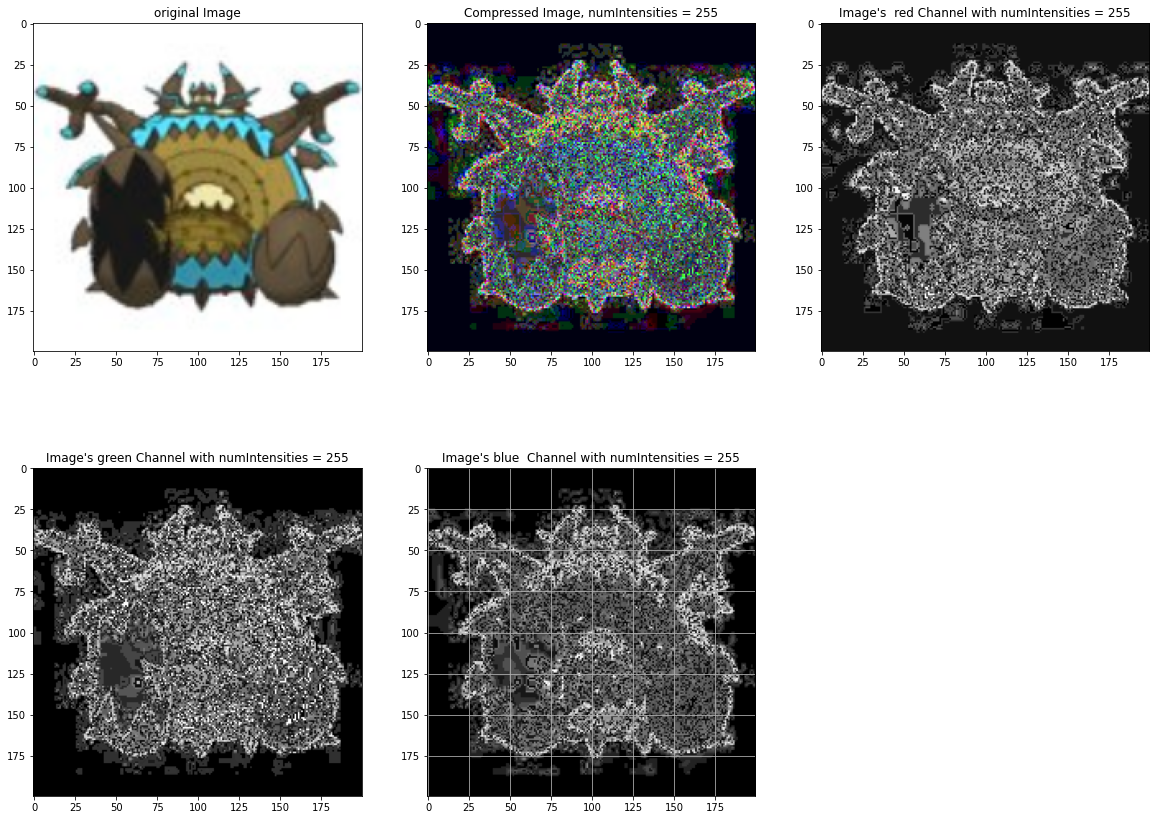

In [8]:
## image with 255 color intensities
compressor(Img, 255, 200, 200)

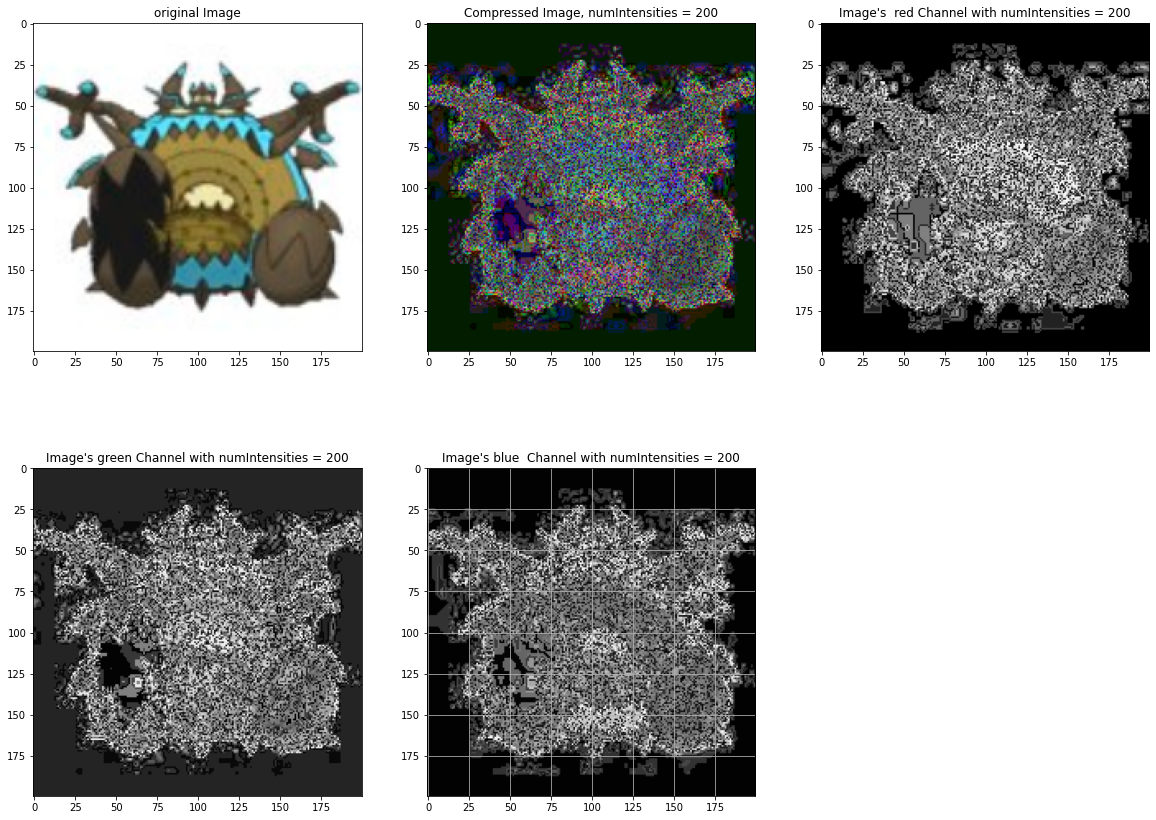

In [6]:
## image with 200 color channels
compressor(Img, 200, 200, 200)

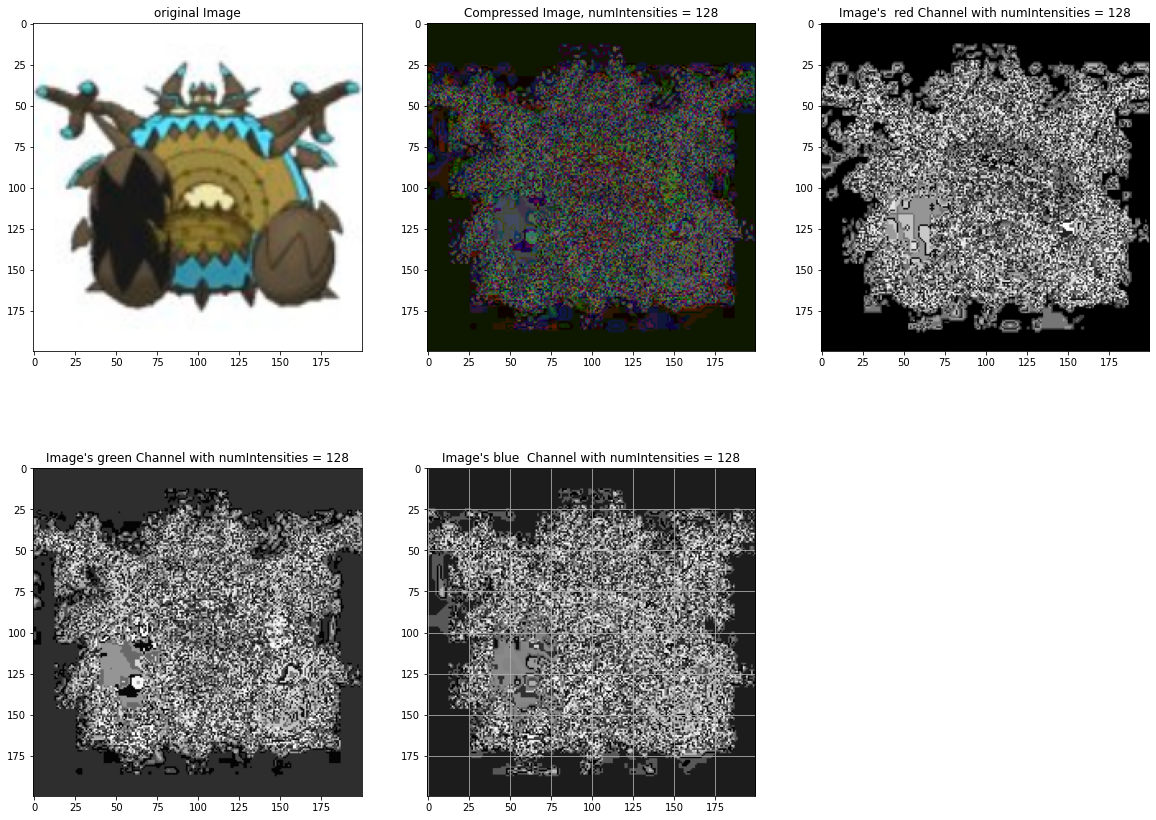

In [7]:
## image with 128 color channels
## 7 bits for each pixel ie 
## a saving of width*height bytes on a image
## here 40000 bytes or  aaprrox 39 kb savings
compressor(Img, 128, 200, 200)